In [29]:
import pandas as pd 
import numpy as np

In [30]:
df = pd.read_csv("C:\\Users\\DELL\\Documents\\Automobile_data.csv")

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [32]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [33]:
cols = df.select_dtypes(include=['object']).columns

In [34]:
cols

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lb = LabelEncoder()

In [37]:
for x in cols:
    df[x] = lb.fit_transform(df[x])

In [38]:
from sklearn.cluster import KMeans

In [39]:
import matplotlib.pyplot as plt

In [71]:
x = df.iloc[: , [0,19]].values

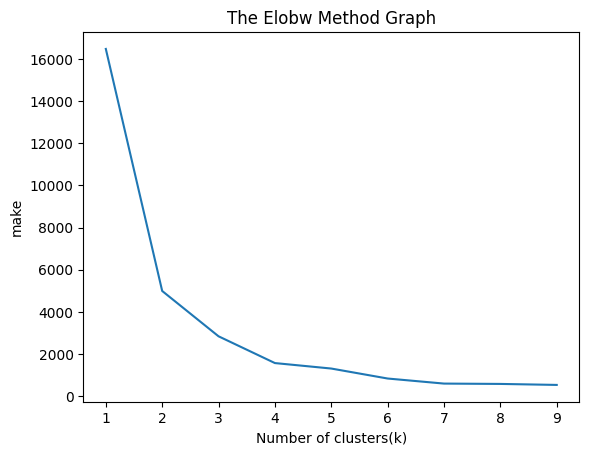

In [72]:
a = []
for i in range(1,10):
    b = KMeans(n_clusters = i , init = 'k-means++' , random_state = 11)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,10) , a)

plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('make')
plt.show()

In [73]:
b = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= b.fit_predict(x)

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
#silhouette_score(y_predict,x)